# Import Library and Dataset

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Dropout,SimpleRNN
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Jakarta 2015 - 2022.csv to Jakarta 2015 - 2022.csv


# Load Dataset and Preprocessing

In [ ]:
data = pd.read_csv("Jakarta 2015 - 2022.csv",delimiter=',')
data

,datetime,total_visitor,total_accomodation
0,1/1/2014,193017,16332
1,2/1/2014,185851,17101
2,3/1/2014,204004,17438
3,4/1/2014,186373,17943
4,5/1/2014,190716,18123
...,...,...,...
103,8/1/2022,121438,68569
104,9/1/2022,111139,69382
105,10/1/2022,112588,69626
106,11/1/2022,113958,69843


In [ ]:
data_original = data.copy()
train_datetime = pd.to_datetime(data['datetime'])
data = data.set_index('datetime')
data.head(10)

,total_visitor,total_accomodation
datetime,,
1/1/2014,193017,16332
2/1/2014,185851,17101
3/1/2014,204004,17438
4/1/2014,186373,17943
5/1/2014,190716,18123
6/1/2014,213950,18293
7/1/2014,173914,18592
8/1/2014,224492,18872
9/1/2014,179723,19102


In [ ]:
col = list(data)[0:3]

In [ ]:
data_training = data[col].astype(float)

In [ ]:
data_training.isna().sum()

total_visitor         0
total_accomodation    0
dtype: int64

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(data_training)
scaled_data_train = scaler.transform(data_training)

In [ ]:
scaled_data_train

array([[ 4.61138731e-01, -1.59836885e+00],
       [ 3.79450936e-01, -1.55219148e+00],
       [ 5.86383470e-01, -1.53195511e+00],
       [ 3.85401400e-01, -1.50163057e+00],
       [ 4.34908809e-01, -1.49082183e+00],
       [ 6.99761478e-01, -1.48061357e+00],
       [ 2.43376807e-01, -1.46265904e+00],
       [ 8.19933503e-01, -1.44584544e+00],
       [ 3.09595674e-01, -1.43203426e+00],
       [ 3.58487518e-01, -1.42122552e+00],
       [ 3.91921833e-01, -1.38843899e+00],
       [ 4.98540022e-01, -1.36417936e+00],
       [ 2.50341814e-01, -1.33643691e+00],
       [ 2.91368102e-01, -1.32418700e+00],
       [ 6.33987186e-01, -1.27218492e+00],
       [ 1.62498367e-01, -1.23363373e+00],
       [ 4.85738544e-01, -1.21988260e+00],
       [ 3.07042218e-01, -1.20132759e+00],
       [ 3.10758408e-01, -1.15268823e+00],
       [ 1.21234498e+00, -1.13617487e+00],
       [ 7.45860479e-01, -1.11539806e+00],
       [ 5.79999830e-01, -1.09570212e+00],
       [ 8.03985802e-01, -1.08117037e+00],
       [ 4.

In [ ]:
len(scaled_data_train)

108

# Scenario 1- 80%train : 20%test

In [ ]:
# Define sequence length and features
sequence_length = 12  # Number of time steps in each sequence

# Create sequences and corresponding labels
sequences = []
labels = []

for i in range(len(scaled_data_train) - sequence_length):
    seq = scaled_data_train[i:i+sequence_length]
    label = scaled_data_train[i+sequence_length][1]
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split the data into training and testing setsS
X_train, X_test, Y_train, Y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

print("Train X shape:", X_train.shape)
print("Train Y shape:", Y_train.shape)
print("Test X shape:", X_test.shape)
print("Test Y shape:", Y_test.shape)


Train X shape: (76, 12, 2)
Train Y shape: (76,)
Test X shape: (20, 12, 2)
Test Y shape: (20,)


In [ ]:
X_train

array([[[ 6.61516634e-01, -4.88190566e-01],
        [ 1.11360850e-01, -4.35047567e-01],
        [ 1.51804155e+00, -3.98958366e-01],
        ...,
        [ 5.79703446e-01, -1.08383252e-01],
        [ 1.04928857e+00, -5.40392805e-02],
        [ 8.13960240e-01, -4.15892067e-04]],

       [[ 1.13131835e+00,  4.68743720e-01],
        [ 6.77031159e-01,  5.05133164e-01],
        [ 4.20203638e-01,  5.21286234e-01],
        ...,
        [-1.73441169e+00,  7.55415676e-01],
        [-1.72859802e+00,  7.97870027e-01],
        [-1.70326865e+00,  8.31797479e-01]],

       [[ 1.62498367e-01, -1.23363373e+00],
        [ 4.85738544e-01, -1.21988260e+00],
        [ 3.07042218e-01, -1.20132759e+00],
        ...,
        [ 7.20900636e-02, -1.03331164e+00],
        [ 2.16234937e-01, -1.01926027e+00],
        [ 6.40917995e-01, -1.00622973e+00]],

       ...,

       [[ 6.33987186e-01, -1.27218492e+00],
        [ 1.62498367e-01, -1.23363373e+00],
        [ 4.85738544e-01, -1.21988260e+00],
        ...,
     

In [ ]:
Y_train

array([ 2.91280129e-02,  8.72750615e-01, -9.53567118e-01,  8.96830099e-01,
        1.44825628e+00, -1.09570212e+00, -4.15892067e-04, -1.04778335e+00,
        1.40578191e-01,  4.68743720e-01, -4.88190566e-01,  1.01560620e+00,
        9.57118881e-01, -1.20132759e+00,  1.27907939e-01,  2.77969359e-01,
       -1.62006640e-01, -9.32369967e-01,  2.35935347e-01, -2.08604344e-01,
       -1.13617487e+00,  1.53838921e+00, -5.27522391e-01, -8.02364775e-01,
        1.19863430e+00, -6.04264486e-01,  1.46639095e+00, -1.01926027e+00,
       -6.26362366e-01, -1.23363373e+00, -8.97661883e-01, -5.40392805e-02,
       -1.11539806e+00,  1.10892171e+00, -1.15268823e+00,  6.87260529e-01,
       -1.42190607e-01,  1.32857944e+00,  5.05133164e-01,  1.69655718e+00,
        4.16861741e-01,  9.81238396e-02,  3.03610105e-01,  7.97870027e-01,
        1.83332785e-01,  8.31797479e-01,  6.47208122e-01,  1.60186056e+00,
        1.13396197e+00,  6.34157562e-02,  5.52031111e-01,  2.54730555e-01,
        1.30281860e+00,  

In [ ]:
#Create the RNN model
model = Sequential()

#Add RNN layers with dropout
model.add(SimpleRNN(60,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) # Unit = 12,24,36,48 (Bebas)
model.add(SimpleRNN(48,activation="tanh",return_sequences=True))
model.add(SimpleRNN(48,activation="tanh",return_sequences=False))
model.add(Dense(1))

model.compile(optimizer="adam",loss="MSE")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 12, 60)            3780      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 12, 48)            5232      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 48)                4656      
                                                                 
 dense (Dense)               (None, 1)                 49        
                                                                 
Total params: 13717 (53.58 KB)
Trainable params: 13717 (53.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(X_train, Y_train, epochs =100, batch_size = 12, validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping])

Epoch 1/100
5/5 [==============================] - 4s 186ms/step - loss: 0.8827 - val_loss: 0.2674
Epoch 2/100
5/5 [==============================] - 0s 25ms/step - loss: 0.1758 - val_loss: 0.1108
Epoch 3/100
5/5 [==============================] - 0s 29ms/step - loss: 0.0703 - val_loss: 0.0398
Epoch 4/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0368 - val_loss: 0.0201
Epoch 5/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0136 - val_loss: 0.0099
Epoch 6/100
5/5 [==============================] - 0s 29ms/step - loss: 0.0103 - val_loss: 0.0121
Epoch 7/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0092 - val_loss: 0.0076
Epoch 8/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0057 - val_loss: 0.0099
Epoch 9/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0040 - val_loss: 0.0062
Epoch 10/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 11/100
5/5 [

In [ ]:
# Extract epoch information
epoch_info = pd.DataFrame({
    'Epoch': list(range(1, len(history.history['loss']) + 1)),
    'Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss']
})

# Display the epoch information table
print("Epoch Information Table:")
print(epoch_info.to_markdown(index=False))


Epoch Information Table:
|   Epoch |        Loss |   Validation Loss |
|--------:|------------:|------------------:|
|       1 | 0.882652    |        0.26739    |
|       2 | 0.175844    |        0.110758   |
|       3 | 0.0702864   |        0.0398261  |
|       4 | 0.0368034   |        0.0201128  |
|       5 | 0.0135893   |        0.0099038  |
|       6 | 0.0103082   |        0.0120892  |
|       7 | 0.00923362  |        0.00757201 |
|       8 | 0.00569496  |        0.00990589 |
|       9 | 0.00402697  |        0.00615652 |
|      10 | 0.00371785  |        0.00369676 |
|      11 | 0.00343845  |        0.00339935 |
|      12 | 0.00263263  |        0.0035567  |
|      13 | 0.00231589  |        0.00325337 |
|      14 | 0.00186096  |        0.0027508  |
|      15 | 0.00182931  |        0.00312381 |
|      16 | 0.0016165   |        0.00261743 |
|      17 | 0.00143833  |        0.00191421 |
|      18 | 0.00142473  |        0.00194226 |
|      19 | 0.00137742  |        0.00262662 |
|      20

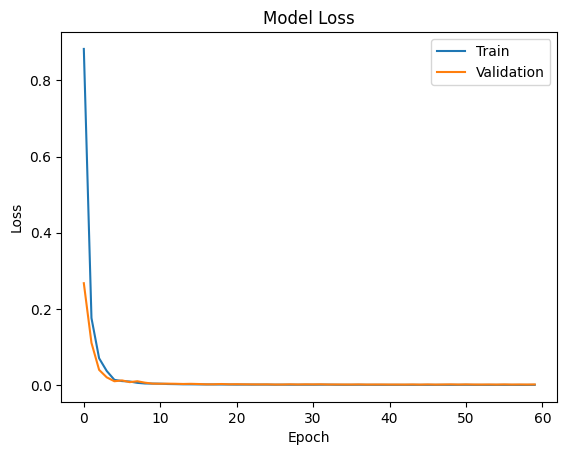

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
#plt.show()

In [ ]:
# Predict for 12 month
n_past = 1
n_month_for_prediction = 12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
prediction = model.predict(X_train[-n_month_for_prediction:])
mse = mean_squared_error(Y_train[-n_month_for_prediction:], prediction)
fmape = np.mean(np.abs((mse) / prediction)) * 100
mape = f"{(fmape*100):.2f}%"
mae = np.mean(np.abs((mse) / prediction))

print("MSE:", mse)
print("MAPE:", mape)
print("MAE:", mae)



1/1 [==============================] - 0s 399ms/step
MSE: 0.0010340978481810602
MAPE: 12.09%
MAE: 0.0012090437


In [ ]:
prediction_copies = np.repeat(prediction, data_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [ ]:
prediction_copies.shape

(12, 2)

In [ ]:
data_training.shape[1]

2

<ipython-input-22-58f27a549218>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


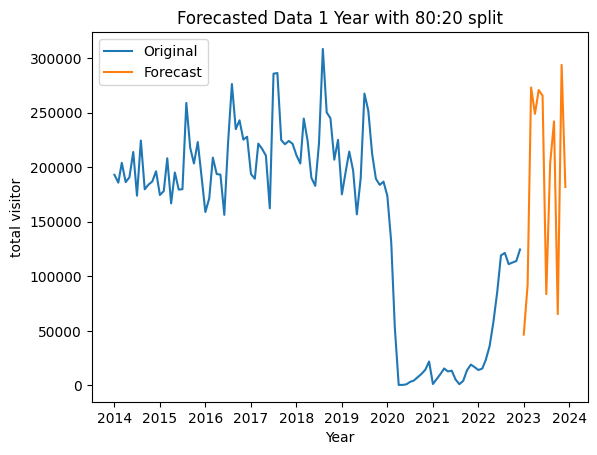

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date': forecast_dates, 'total_visitor': y_pred_future})
df_forecast['date'] = pd.to_datetime(df_forecast['Date'])

# Assuming 'original' contains the original data with 'Datetime' and 'jumlah_penderita' columns
original = data_original[['datetime', 'total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2014-01-01']

sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('total visitor')
plt.title('Forecasted Data 1 Year with 80:20 split')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates, y_pred_future))

In [ ]:
# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates, y_pred_future))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print("Hasil Forecast RNN scenario 1")
print(table)

Hasil Forecast RNN scenario 1
╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │      46539.9 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │      92212.8 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │     273125   │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │     248934   │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │     270753   │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │     265643   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │      83658.3 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │     203521   │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │     242059   │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │      65297.4 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │     293835   │
├─────────────────────┼───────────

# Scenario 2- 70%train : 30%test

In [ ]:
# Define sequence length and features
sequence_length2 = 12  # Number of time steps in each sequence
num_features2 = len(data_training.columns)

# Create sequences and corresponding labels
sequences2 = []
labels2 = []

for i in range(len(scaled_data_train) - sequence_length2):
    seq = scaled_data_train[i:i+sequence_length2]
    label = scaled_data_train[i+sequence_length2][1]  # Assuming '_tempm' is the column of interest
    sequences2.append(seq)
    labels2.append(label)

# Convert to numpy arrays
sequences2 = np.array(sequences2)
labels2 = np.array(labels2)

# Split the data into training and testing sets
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(sequences2, labels2, test_size=0.3, random_state=42)

print("Train X shape:", X_train2.shape)
print("Train Y shape:", Y_train2.shape)
print("Test X shape:", X_test2.shape)
print("Test Y shape:", Y_test2.shape)


Train X shape: (67, 12, 2)
Train Y shape: (67,)
Test X shape: (29, 12, 2)
Test Y shape: (29,)


In [ ]:
#Create the RNN model
model2 = Sequential()

#Add RNN layers with dropout
model2.add(SimpleRNN(60,activation="tanh",return_sequences=True, input_shape=(X_train2.shape[1], X_train2.shape[2]))) # Unit = 12,24,36,48 (Bebas)
model2.add(SimpleRNN(48,activation="tanh",return_sequences=True))
model2.add(SimpleRNN(48,activation="tanh",return_sequences=False))
model2.add(Dense(1))

model2.compile(optimizer="adam",loss="MSE")
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 12, 60)            3780      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 12, 48)            5232      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 48)                4656      
                                                                 
 dense_1 (Dense)             (None, 1)                 49        
                                                                 
Total params: 13717 (53.58 KB)
Trainable params: 13717 (53.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define callbacks
early_stopping2 = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

history2 = model2.fit(X_train2, Y_train2, epochs =100, batch_size = 12, validation_split=0.4,  # Use part of the training data as validation
    callbacks=[early_stopping])

Epoch 1/100
4/4 [==============================] - 3s 159ms/step - loss: 0.1935 - val_loss: 0.0719
Epoch 2/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0714 - val_loss: 0.0379
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0401 - val_loss: 0.0207
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0293 - val_loss: 0.0640
Epoch 5/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0277 - val_loss: 0.0214
Epoch 6/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0130 - val_loss: 0.0152
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0046 - val_loss: 0.0175
Epoch 8/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0066 - val_loss: 0.0121
Epoch 9/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0031 - val_loss: 0.0103
Epoch 10/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0039 - val_loss: 0.0098
Epoch 11/100
4/4 [

In [ ]:
# Extract epoch information
epoch_info = pd.DataFrame({
    'Epoch': list(range(1, len(history2.history['loss']) + 1)),
    'Loss': history2.history['loss'],
    'Validation Loss': history2.history['val_loss']
})

# Display the epoch information table
print("Epoch Information Table:")
print(epoch_info.to_markdown(index=False))


Epoch Information Table:
|   Epoch |        Loss |   Validation Loss |
|--------:|------------:|------------------:|
|       1 | 0.193548    |        0.071932   |
|       2 | 0.0713882   |        0.0379487  |
|       3 | 0.0401344   |        0.0206786  |
|       4 | 0.0292564   |        0.0639977  |
|       5 | 0.0277313   |        0.0213746  |
|       6 | 0.012965    |        0.0151974  |
|       7 | 0.00460575  |        0.0175299  |
|       8 | 0.00662105  |        0.0121389  |
|       9 | 0.00313283  |        0.0102815  |
|      10 | 0.00393732  |        0.00977782 |
|      11 | 0.00300028  |        0.0101583  |
|      12 | 0.00156027  |        0.00806513 |
|      13 | 0.00171412  |        0.00858364 |
|      14 | 0.00134359  |        0.00904003 |
|      15 | 0.000885741 |        0.00767419 |
|      16 | 0.000851159 |        0.00813458 |
|      17 | 0.000717471 |        0.00721433 |
|      18 | 0.000580312 |        0.00719053 |
|      19 | 0.000470756 |        0.00725594 |
|      20

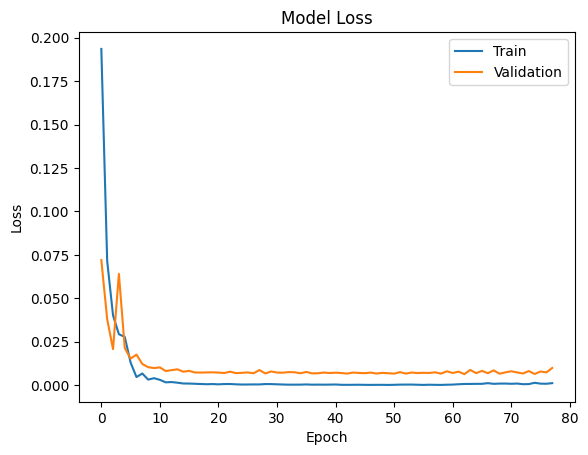

In [ ]:
# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
#plt.show()

In [ ]:
#Predict for 12 months
n_past2 = 1
n_month_for_prediction2 = 12
predict_period_month2 = pd.date_range(list(train_datetime)[-n_past2], periods=n_month_for_prediction2, freq='M').tolist()
print(predict_period_month2)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
prediction2 = model2.predict(X_train[-n_month_for_prediction:])
mse2 = mean_squared_error(Y_train2[-n_month_for_prediction:], prediction2)
fmape2 = np.mean(np.abs((mse2) / prediction2)) * 100
mape2 = f"{(fmape2*100):.2f}%"
mae2 = np.mean(np.abs((mse2) / prediction2))

print("MSE:", mse2)
print("MAPE:", mape2)
print("MAE:", mae2)



1/1 [==============================] - 0s 370ms/step
MSE: 0.004001334240983541
MAPE: 43.23%
MAE: 0.004323458


In [ ]:
prediction_copies2 = np.repeat(prediction2, data_training.shape[1], axis=-1)
y_pred_future2 = scaler.inverse_transform(prediction_copies2)[:,0]

<ipython-input-32-b87c1e5081ec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


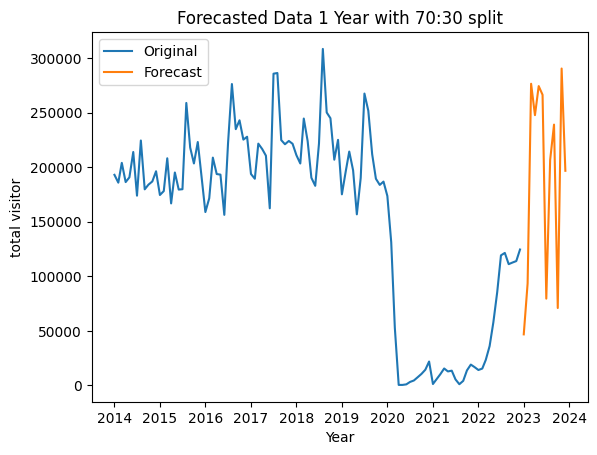

In [ ]:
forecast_dates2 = []

for time_i in predict_period_month2:
    forecast_dates2.append(time_i.date())

df_forecast2 = pd.DataFrame({'Date': forecast_dates2, 'total_visitor': y_pred_future2})
df_forecast2['date'] = pd.to_datetime(df_forecast2['Date'])

# Assuming 'original' contains the original data with 'Datetime' and 'jumlah_penderita' columns
original = data_original[['datetime', 'total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2014-01-01']

sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast2, x='date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('total visitor')
plt.title('Forecasted Data 1 Year with 70:30 split')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates2 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates2, y_pred_future2))

In [ ]:
# Create a list of forecast dates and prediction values
data2 = list(zip(forecast_dates2, y_pred_future2))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table2 = tabulate(data2, headers=headers, tablefmt='fancy_grid')
# Print the table
print("Hasil Forecast RNN scenario 2")
print(table2)

Hasil Forecast RNN scenario 2
╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │      46758.7 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │      93505.1 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │     276513   │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │     247733   │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │     274370   │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │     266379   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │      79519.2 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │     206765   │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │     239054   │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │      70927.2 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │     290472   │
├─────────────────────┼───────────

#Scenario 3- 60%train : 40%test

In [ ]:
# Define sequence length and features
sequence_length3 = 12  # Number of time steps in each sequence
num_features3 = len(data_training.columns)

# Create sequences and corresponding labels
sequences3 = []
labels3 = []

for i in range(len(scaled_data_train) - sequence_length3):
    seq = scaled_data_train[i:i+sequence_length3]
    label = scaled_data_train[i+sequence_length3][1]  # Assuming '_tempm' is the column of interest
    sequences3.append(seq)
    labels3.append(label)

# Convert to numpy arrays
sequences3 = np.array(sequences3)
labels3 = np.array(labels3)

# Split the data into training and testing sets
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(sequences3, labels3, test_size=0.4, random_state=42)

print("Train X shape:", X_train3.shape)
print("Train Y shape:", Y_train3.shape)
print("Test X shape:", X_test3.shape)
print("Test Y shape:", Y_test3.shape)


Train X shape: (57, 12, 2)
Train Y shape: (57,)
Test X shape: (39, 12, 2)
Test Y shape: (39,)


In [ ]:
#Create the RNN model
model3 = Sequential()

#Add RNN layers with dropout
model3.add(SimpleRNN(60,activation="tanh",return_sequences=True, input_shape=(X_train3.shape[1], X_train3.shape[2]))) # Unit = 12,24,36,48 (Bebas)
model3.add(SimpleRNN(48,activation="tanh",return_sequences=True))
model3.add(SimpleRNN(48,activation="tanh",return_sequences=False))
model3.add(Dense(1))

model3.compile(optimizer="adam",loss="MSE")
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 12, 60)            3780      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 12, 48)            5232      
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 48)                4656      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 13717 (53.58 KB)
Trainable params: 13717 (53.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define callbacks
early_stopping3 = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

history3 = model3.fit(X_train3, Y_train3, epochs =100, batch_size = 12, validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping3])

Epoch 1/100
4/4 [==============================] - 3s 163ms/step - loss: 0.7937 - val_loss: 0.3461
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 0.2778 - val_loss: 0.1428
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 0.1155 - val_loss: 0.0308
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0753 - val_loss: 0.0193
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0334 - val_loss: 0.0163
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0241 - val_loss: 0.0188
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0138 - val_loss: 0.0135
Epoch 8/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0098 - val_loss: 0.0145
Epoch 9/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0117 - val_loss: 0.0052
Epoch 10/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0076 - val_loss: 0.0064
Epoch 11/100
4/4 [

In [ ]:
# Extract epoch information
epoch_info = pd.DataFrame({
    'Epoch': list(range(1, len(history3.history['loss']) + 1)),
    'Loss': history3.history['loss'],
    'Validation Loss': history3.history['val_loss']
})

# Display the epoch information table
print("Epoch Information Table:")
print(epoch_info.to_markdown(index=False))

Epoch Information Table:
|   Epoch |        Loss |   Validation Loss |
|--------:|------------:|------------------:|
|       1 | 0.793668    |        0.346091   |
|       2 | 0.277769    |        0.14281    |
|       3 | 0.115512    |        0.0308124  |
|       4 | 0.0753449   |        0.0192745  |
|       5 | 0.0334291   |        0.0162686  |
|       6 | 0.0241353   |        0.0187795  |
|       7 | 0.0138377   |        0.0135204  |
|       8 | 0.0098297   |        0.0144732  |
|       9 | 0.0117112   |        0.00518017 |
|      10 | 0.00762958  |        0.00641508 |
|      11 | 0.00474253  |        0.00243045 |
|      12 | 0.00349297  |        0.00505825 |
|      13 | 0.00322458  |        0.00271179 |
|      14 | 0.00259699  |        0.0021274  |
|      15 | 0.00155318  |        0.0027446  |
|      16 | 0.00163099  |        0.00211956 |
|      17 | 0.00132142  |        0.00186842 |
|      18 | 0.00119243  |        0.00158085 |
|      19 | 0.0013344   |        0.00151635 |
|      20

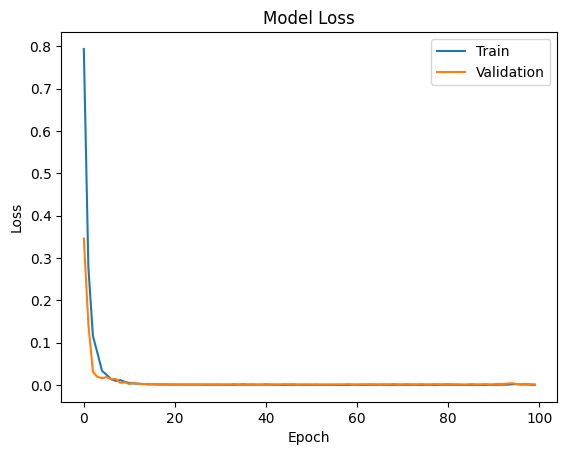

In [ ]:
# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
#plt.show()

In [ ]:
n_past3 = 1
n_month_for_prediction3 = 12
predict_period_month3 = pd.date_range(list(train_datetime)[-n_past3], periods=n_month_for_prediction3, freq='M').tolist()
print(predict_period_month3)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
prediction3= model3.predict(X_train3[-n_month_for_prediction:])
mse3 = mean_squared_error(Y_train3[-n_month_for_prediction:], prediction3)
fmape3 = np.mean(np.abs((mse3) / prediction3)) * 100
mape3 = f"{(fmape3*100):.2f}%"
mae3 = np.mean(np.abs((mse3) / prediction3))

print("MSE:", mse3)
print("MAPE:", mape3)
print("MAE:", mae3)



1/1 [==============================] - 1s 570ms/step
MSE: 0.0015238387391252391
MAPE: 18.15%
MAE: 0.0018147641


In [ ]:
prediction_copies3 = np.repeat(prediction3, data_training.shape[1], axis=-1)
y_pred_future3 = scaler.inverse_transform(prediction_copies3)[:,0]

<ipython-input-42-7b82ce271e08>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


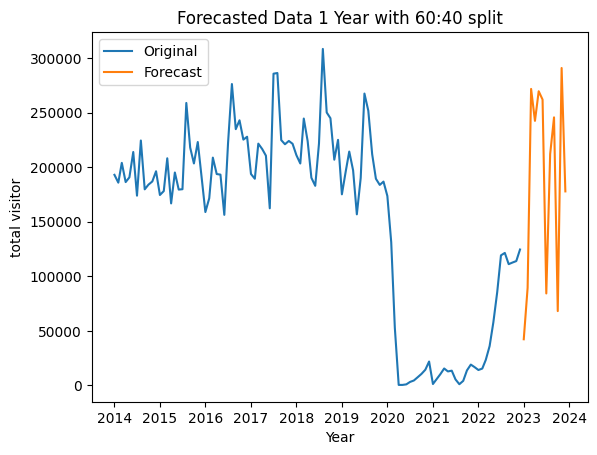

In [ ]:
forecast_dates3 = []

for time_i in predict_period_month3:
    forecast_dates3.append(time_i.date())

df_forecast3 = pd.DataFrame({'Date': forecast_dates3, 'total_visitor': y_pred_future3})
df_forecast3['date'] = pd.to_datetime(df_forecast3['Date'])

# Assuming 'original' contains the original data with 'Datetime' and 'jumlah_penderita' columns
original = data_original[['datetime', 'total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2014-01-01']

sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast3, x='date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('total visitor')
plt.title('Forecasted Data 1 Year with 60:40 split')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates3 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates3, y_pred_future3))

In [ ]:
# Create a list of forecast dates and prediction values
data3 = list(zip(forecast_dates3, y_pred_future3))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table3 = tabulate(data3, headers=headers, tablefmt='fancy_grid')
# Print the table
print("Hasil Forecast RNN scenario 3")
print(table3)

Hasil Forecast RNN scenario 3
╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │      42258.8 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │      89448.6 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │     271773   │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │     242503   │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │     269644   │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │     262014   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │      84270.8 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │     212092   │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │     245707   │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │      68103.7 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │     290956   │
├─────────────────────┼───────────

#Comparison and conclusion

In [ ]:

# Define the data for each scenario
comparison_error = [
    {
        'Scenario': 'Scenario 1',
        'Model': 'RNN',
        'MAPE': mape,
        'MAE': mae,
        'MSE': mse,
    },
    {
        'Scenario': 'Scenario 2',
        'Model': 'RNN',
        'MAPE': mape2,
        'MAE': mae2,
        'MSE': mse2,
    },
    {
        'Scenario': 'Scenario 3',
        'Model': 'RNN',
        'MAPE': mape3,
        'MAE': mae3,
        'MSE': mse3,
    }
]

# Create a DataFrame from the scenario data
df = pd.DataFrame(comparison_error)

# Convert DataFrame to a list of rows
rows = df.values.tolist()

# Create a list of headers
headers = df.columns.tolist()

# Generate the table
table = tabulate(rows, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table)

╒════════════╤═════════╤════════╤════════════╤════════════╕
│ Scenario   │ Model   │ MAPE   │        MAE │        MSE │
╞════════════╪═════════╪════════╪════════════╪════════════╡
│ Scenario 1 │ RNN     │ 12.09% │ 0.00120904 │ 0.0010341  │
├────────────┼─────────┼────────┼────────────┼────────────┤
│ Scenario 2 │ RNN     │ 43.23% │ 0.00432346 │ 0.00400133 │
├────────────┼─────────┼────────┼────────────┼────────────┤
│ Scenario 3 │ RNN     │ 18.15% │ 0.00181476 │ 0.00152384 │
╘════════════╧═════════╧════════╧════════════╧════════════╛


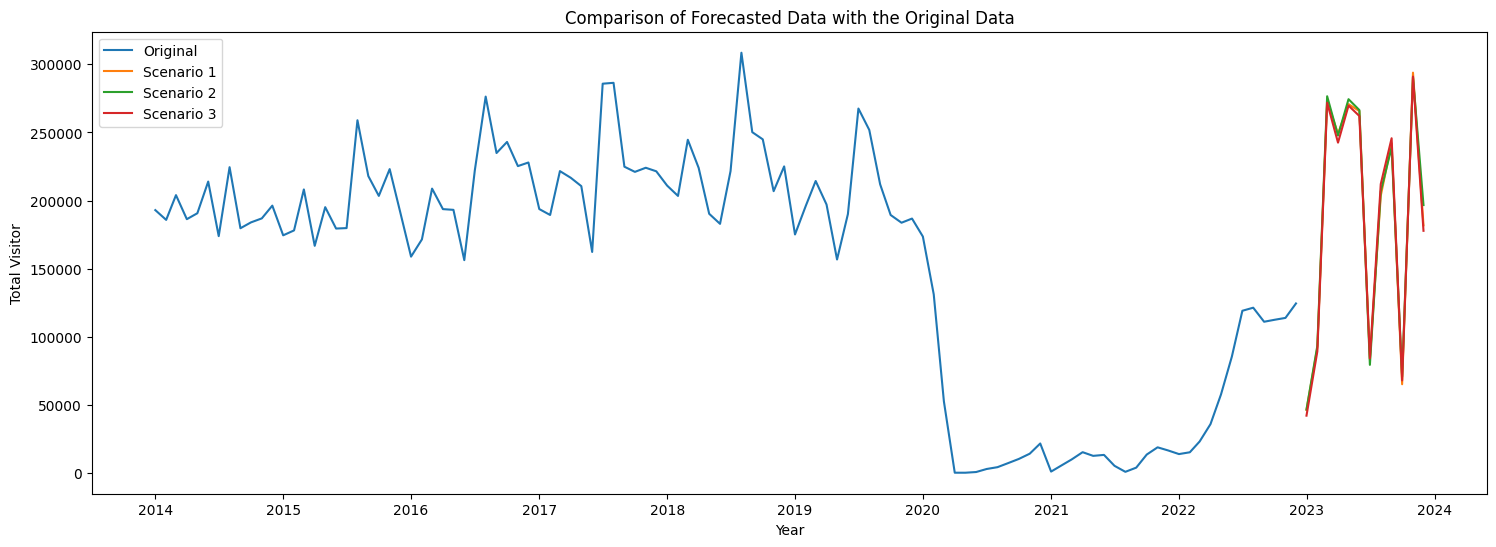

In [ ]:
# Plot the wider graph
plt.figure(figsize=(18, 6))
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='date', y='total_visitor', label='Scenario 1')
sns.lineplot(data=df_forecast2, x='date', y='total_visitor', label='Scenario 2')
sns.lineplot(data=df_forecast3, x='date', y='total_visitor', label='Scenario 3')

plt.xlabel('Year')
plt.ylabel('Total Visitor')
plt.title('Comparison of Forecasted Data with the Original Data')
plt.legend()
plt.show()
